In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
# weather_auckland = pd.read_csv("../AucklandMotatStationNiwa_08June24/motatstation_weather_auckland_2016_2024.csv", index_col='Date', parse_dates=True)

weather_auckland = pd.read_csv("../AucklandMotatStationNiwa_08June24/motatstation_weather_auckland_2016_2024.csv",  parse_dates=True)
weather_auckland.head()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
0,20160301,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
1,20160302,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2,20160303,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
3,20160304,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
4,20160305,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [6]:
weather_auckland.tail()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
2934,20240313,216.0,1.2,230.0,9.9,214.0,0.2,20.2,19.3,91.0,...,19.7,19.6,19.8,1012.7,1010.8,5.1,14.13,21.80,0.8,39.4
2935,20240314,254.0,1.4,286.0,7.7,256.0,0.6,19.3,18.8,95.0,...,19.1,19.4,19.9,1011.8,1009.9,6.7,15.45,20.10,1.9,39.4
2936,20240315,194.0,3.1,310.0,8.7,179.0,7.0,17.1,16.6,95.0,...,19.5,19.9,20.0,1005.9,1004.0,0.0,5.50,18.25,2.3,39.4
2937,20240316,219.0,3.1,216.0,11.9,244.0,0.0,16.2,12.5,63.0,...,17.6,18.9,19.8,1010.8,1008.9,10.7,21.19,16.20,3.6,39.4
2938,20240317,160.0,0.5,210.0,7.7,157.0,0.0,12.8,12.3,94.0,...,15.6,17.5,20.0,1017.5,1015.6,6.1,11.82,14.25,2.0,39.4


In [7]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

import warnings
warnings.filterwarnings('ignore')

In [8]:
# to calculate auto-corelation
acf(weather_auckland['Rain(mm)'])

array([ 1.00000000e+00,  1.38649594e-01,  9.09652904e-02,  2.12399925e-02,
        6.56003935e-02,  2.56008376e-02, -6.98598918e-04,  1.12198401e-02,
        1.48830939e-02,  1.42044562e-02,  6.48002306e-03,  3.72056960e-02,
       -4.45087923e-03,  4.15003771e-02,  5.44409935e-03,  7.00877205e-03,
        6.43247934e-04,  1.42568982e-01,  4.12979943e-02,  1.74009406e-02,
        1.56291394e-02,  2.05255138e-02,  1.26533760e-02,  2.97265272e-02,
        3.80720961e-02,  4.57035907e-02,  7.27285448e-03,  2.02913417e-02,
        6.17382144e-02,  2.77471916e-02,  1.20635768e-02,  8.16040655e-03,
       -9.25017153e-03,  1.70308006e-02, -2.96633945e-03])

- Rain(mm) ACF: The rainfall data has weak autocorrelation after the first few lags, indicating little to no significant internal structure or temporal dependence beyond short-term effects.
- The autocorrelation values decrease quickly and oscillate around zero, suggesting that there is little to no significant autocorrelation in the rainfall data after the first few lags.

In [9]:
pacf_yw(weather_auckland['Rain(mm)'], nlags=60, method='mle')

array([ 1.00000000e+00,  1.38649594e-01,  7.31477517e-02, -6.06494526e-04,
        5.77051931e-02,  8.66939025e-03, -1.50948908e-02,  1.02859414e-02,
        1.00847163e-02,  7.75242507e-03,  2.63017390e-03,  3.45195079e-02,
       -1.64880430e-02,  3.83164362e-02, -3.83176575e-03, -3.58725463e-03,
       -2.78159181e-05,  1.43048683e-01,  2.80474751e-03, -1.03636090e-02,
        1.11076354e-02,  3.43904648e-04, -1.25420002e-03,  3.21281575e-02,
        2.56868909e-02,  3.09553204e-02, -1.16247371e-02,  1.25637731e-02,
        4.58562681e-02,  1.12844416e-02, -1.11225064e-02,  2.24253161e-03,
       -1.80372772e-02,  1.92414599e-02, -2.75655457e-02, -1.21309013e-02,
        1.62261323e-02,  1.23122366e-02,  7.81680961e-03, -1.14889313e-02,
       -8.11175945e-03, -2.55820913e-03, -5.18418761e-04,  8.33418682e-03,
        6.58767033e-03, -3.36662485e-02, -2.70316446e-02,  6.57789473e-03,
        5.77798817e-02, -1.36726704e-02, -9.88574288e-03,  1.20140010e-02,
        7.40251443e-03,  

- Lag 1: The rainfall data has a moderate positive partial autocorrelation at lag 1. This means that the rainfall amount today is moderately positively correlated with the rainfall amount from one day ago, after accounting for the effects of other intermediate lags.
- Lag 17: The value 0.1634 indicates a moderate positive partial autocorrelation at lag 17. This suggests some periodicity or seasonality in the rainfall data.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

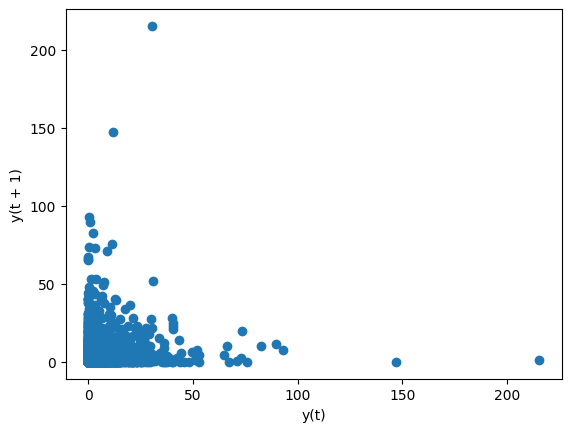

In [10]:
from pandas.plotting import lag_plot
lag_plot(weather_auckland['Rain(mm)'])

In [11]:
acf(weather_auckland['SoilMoist(%)'])

array([1.        , 0.99881267, 0.99715337, 0.99544744, 0.99370489,
       0.99198517, 0.99028912, 0.98868578, 0.98719002, 0.98565195,
       0.98409413, 0.98259907, 0.98111631, 0.97961714, 0.97815819,
       0.97664719, 0.97513009, 0.97360409, 0.97205298, 0.97048239,
       0.96894922, 0.96744424, 0.9659646 , 0.96450489, 0.96300419,
       0.96152194, 0.96004994, 0.95862201, 0.95724995, 0.95592965,
       0.95461065, 0.95326142, 0.9518463 , 0.95043865, 0.94904277])

- SoilMoist(%) ACF: The soil moisture data shows strong and persistent autocorrelation, indicating a high degree of temporal dependence. Soil moisture on any given day is highly correlated with its values on previous days, reflecting the gradual changes in soil moisture over time.
- This suggests that soil moisture is highly correlated with its own past values, indicating a strong temporal dependence in the data.

In [12]:
pacf_yw(weather_auckland['SoilMoist(%)'], nlags=60, method='mle')

array([ 1.00000000e+00,  9.98812667e-01, -1.99461172e-01,  1.98073775e-02,
       -1.70609839e-02,  1.52748185e-02,  4.16186746e-03,  3.69656853e-02,
        3.02534576e-02, -3.50306486e-02,  6.07118998e-04,  2.79831020e-02,
       -4.74839559e-03, -7.04297598e-03,  2.14348619e-02, -3.13974167e-02,
        5.24103292e-03, -4.08037055e-03, -6.35521733e-03, -8.51354778e-03,
        1.91961777e-02,  5.64995563e-03,  3.55409566e-03,  4.74288614e-03,
       -2.07840856e-02,  1.28564062e-02, -2.02358080e-04,  2.20729335e-02,
        1.34025308e-02,  1.50559972e-02, -8.68991751e-03, -1.34326075e-02,
       -2.24803340e-02,  1.63138498e-02,  1.60368089e-03,  3.69397588e-03,
        3.03921407e-03, -7.25462650e-03,  1.08497132e-03, -9.00367180e-03,
       -1.43757430e-02, -1.46952205e-02, -1.20931364e-02,  2.22476100e-02,
       -1.67513526e-02, -1.16431841e-02, -5.40490478e-02,  6.63355965e-03,
        5.10162115e-02, -2.68086043e-02, -1.04590047e-02,  3.96045655e-02,
       -1.68399325e-02,  

- In the  results, lag 1 and lag 2 have relatively higher absolute values compared to the others, suggesting they are more significant.
- Lag 1: The soil moisture data has a very high positive partial autocorrelation at lag 1. This means that the soil moisture value today is highly positively correlated with the soil moisture value from one day ago, after accounting for the effects of other intermediate lags.
- Lag 2: There is a significant negative partial autocorrelation at lag 2, suggesting that the soil moisture value two days ago negatively influences today's value after accounting for the lag 1 effect.
- Other Lags: The remaining lags have much smaller partial autocorrelation values, suggesting they have little to no direct influence on the current value after accounting for the effects of previous lags.


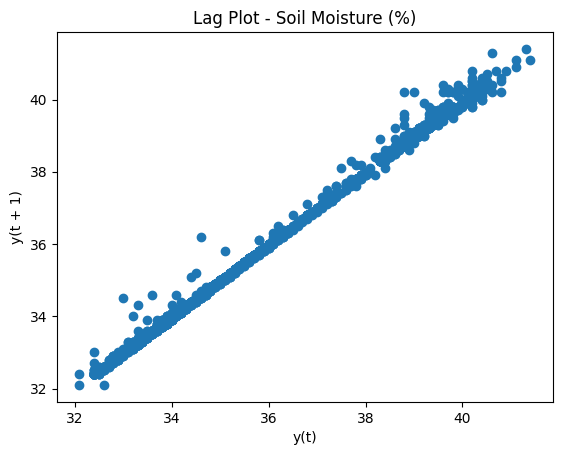

In [13]:
from pandas.plotting import lag_plot
lag_plot(weather_auckland['SoilMoist(%)'])
plt.title('Lag Plot - Soil Moisture (%)')
plt.show()
# this show strong correlation of lag in soil moisture

### To explore the interplay between temperature, rainfall, and soil moisture more comprehensively
- analyze the cross-correlations between parameters

Lag with maximum correlation: -1 days


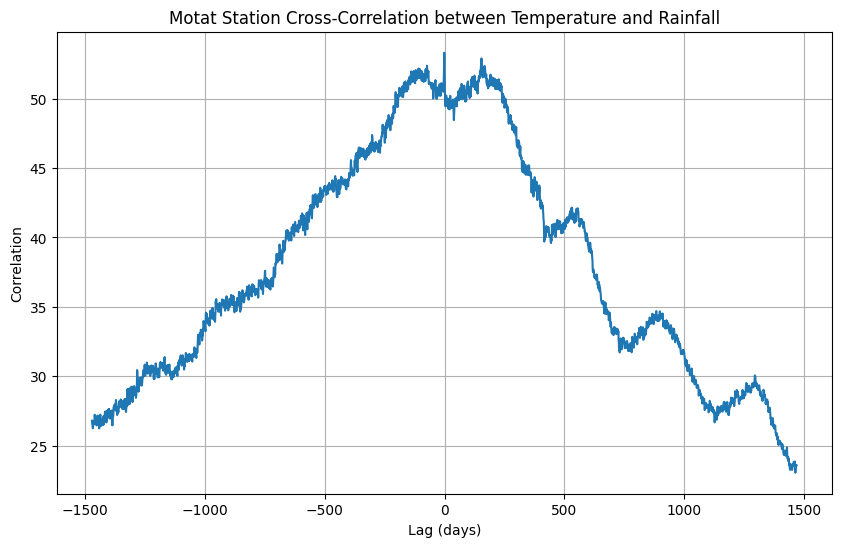

In [14]:
from scipy.signal import correlate

# Cross-correlation between temperature and rainfall
cross_corr_temp_rain = correlate(weather_auckland['Tdry(c)'], weather_auckland['Rain(mm)'], mode='same') / len(weather_auckland)

# Calculate the lag axis -  delay between two time series 
lag_axis = np.arange(-len(weather_auckland)//2, len(weather_auckland)//2)

max_corr_index = np.argmax(cross_corr_temp_rain)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_rain)
plt.title('Motat Station Cross-Correlation between Temperature and Rainfall')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

A lag of 0 days indicates that temperature and rainfall in Auckland are contemporaneously related.
- This might imply that short-term weather patterns directly influence both temperature and rainfall in Auckland

Lag with maximum correlation: 13 days


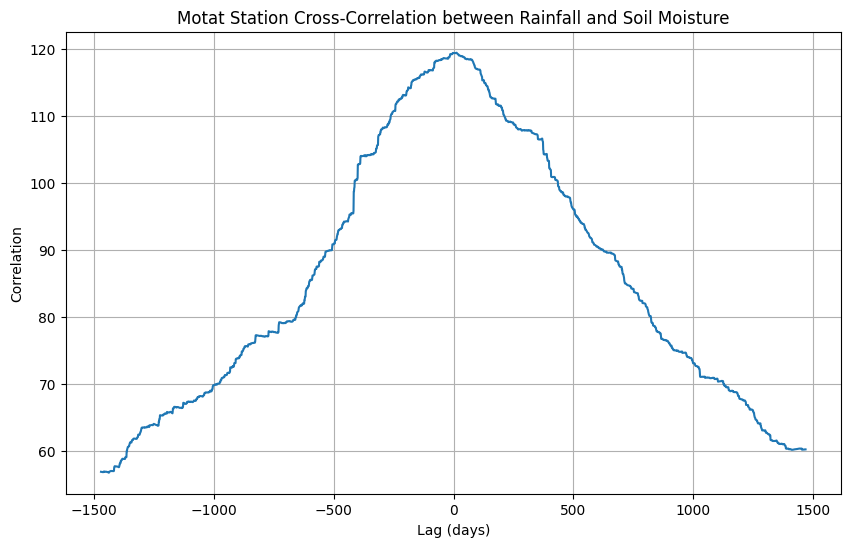

In [15]:
# Cross-Correlation between Rainfall and Soil Moisture:
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt

# Calculate cross-correlation between rainfall and soil moisture
cross_corr_rain_soil = correlate(weather_auckland['Rain(mm)'], weather_auckland['SoilMoist(%)'], mode='same') / len(weather_auckland)
n = len(cross_corr_rain_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_rain_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_rain_soil)
plt.title('Motat Station Cross-Correlation between Rainfall and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

- Lag: A negative lag (-2 days) means that changes in soil moisture are following changes in rainfall. In other words, rainfall events are followed by an increase in soil moisture after about 2 days.

- Maximum correlation: The maximum positive correlation at a lag of -2 days indicates that the two variables (rainfall and soil moisture) are most synchronized with this delay. When rainfall increases, soil moisture responds positively after a lag of 2 days, showing a strong relationship between these variables.

Lag with maximum correlation: -1 days


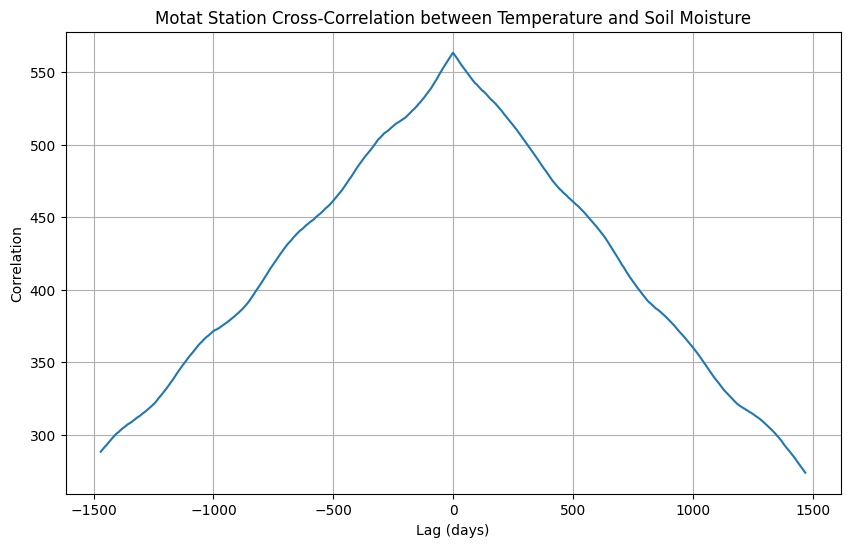

In [16]:
# Calculate cross-correlation between temperature and soil moisture

cross_corr_temp_soil = correlate(weather_auckland['Tdry(c)'], weather_auckland['SoilMoist(%)'], mode='same') / len(weather_auckland)

n = len(cross_corr_temp_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_temp_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_soil)
plt.title('Motat Station Cross-Correlation between Temperature and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

Lag with maximum correlation: -1 days


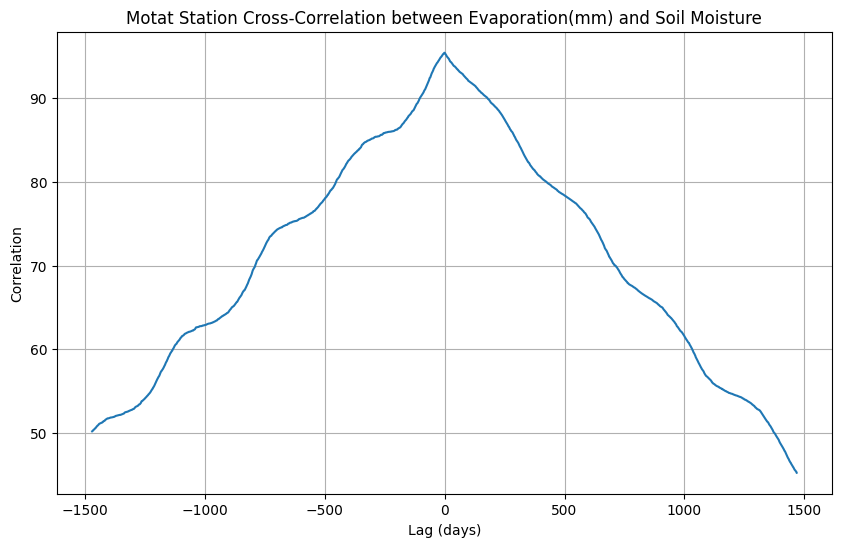

In [17]:
# Calculate cross-correlation between temperature and soil moisture

cross_corr_temp_soil = correlate(weather_auckland['Evaporation(mm)'], weather_auckland['SoilMoist(%)'], mode='same') / len(weather_auckland)

n = len(cross_corr_temp_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_temp_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_soil)
plt.title('Motat Station Cross-Correlation between Evaporation(mm) and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

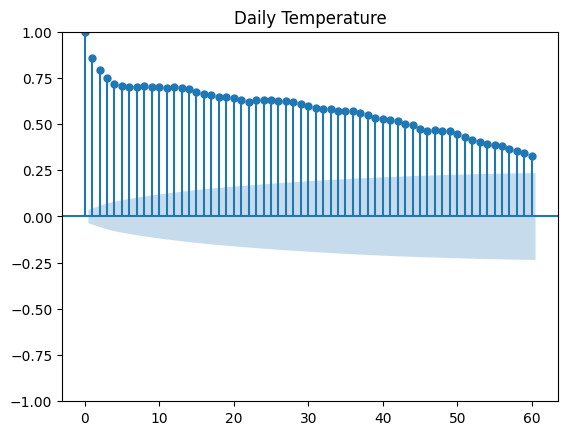

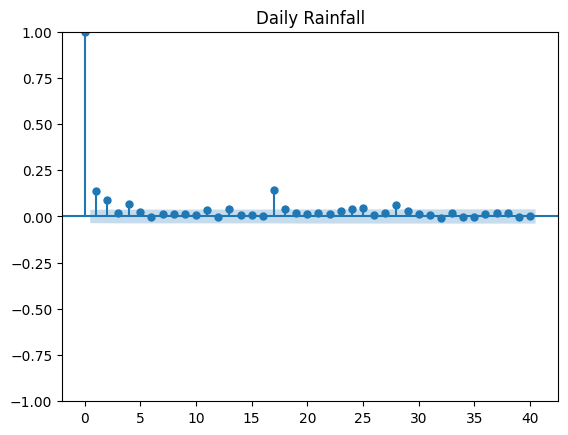

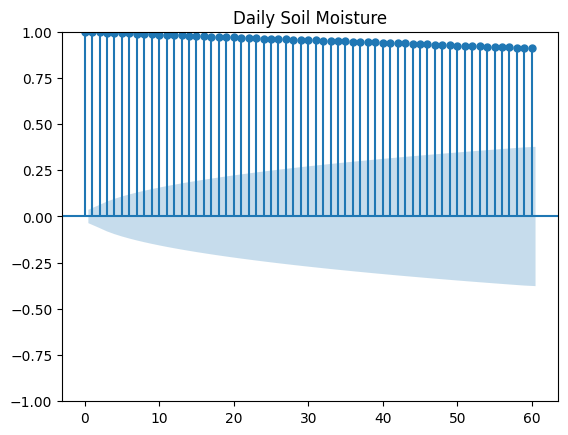

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(weather_auckland['Tdry(c)'], lags=60, title='Daily Temperature');
plot_acf(weather_auckland['Rain(mm)'], lags=40, title='Daily Rainfall');
plot_acf(weather_auckland['SoilMoist(%)'], lags=60, title='Daily Soil Moisture');

# Grid search is eassier compare to above plot

In [19]:
test_size_percentage = 0.20
test_size = int(len(weather_auckland) * test_size_percentage)

train_data = weather_auckland.iloc[:-test_size]
test_data = weather_auckland.iloc[-test_size:]
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (2352, 23)
Test data shape: (587, 23)


# # non stationary show trend or seasonality

In [20]:
from statsmodels.tsa.statespace.tools import diff
# weather_auckland['Rain(mm)'] - weather_auckland['Rain(mm)'].shift(1)
diff(weather_auckland['Rain(mm)'], k_diff=1)

1      -1.8
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2934   -7.0
2935    0.4
2936    6.4
2937   -7.0
2938    0.0
Name: Rain(mm), Length: 2938, dtype: float64

In [21]:
diff(weather_auckland['SoilMoist(%)'], k_diff=1)

1       0.2
2       0.0
3       0.1
4       0.1
5       0.4
       ... 
2934    0.0
2935    0.0
2936    0.0
2937    0.0
2938    0.0
Name: SoilMoist(%), Length: 2938, dtype: float64

In [22]:
weather_auckland.head()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
0,20160301,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
1,20160302,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2,20160303,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
3,20160304,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
4,20160305,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [23]:
weather_auckland.tail()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
2934,20240313,216.0,1.2,230.0,9.9,214.0,0.2,20.2,19.3,91.0,...,19.7,19.6,19.8,1012.7,1010.8,5.1,14.13,21.80,0.8,39.4
2935,20240314,254.0,1.4,286.0,7.7,256.0,0.6,19.3,18.8,95.0,...,19.1,19.4,19.9,1011.8,1009.9,6.7,15.45,20.10,1.9,39.4
2936,20240315,194.0,3.1,310.0,8.7,179.0,7.0,17.1,16.6,95.0,...,19.5,19.9,20.0,1005.9,1004.0,0.0,5.50,18.25,2.3,39.4
2937,20240316,219.0,3.1,216.0,11.9,244.0,0.0,16.2,12.5,63.0,...,17.6,18.9,19.8,1010.8,1008.9,10.7,21.19,16.20,3.6,39.4
2938,20240317,160.0,0.5,210.0,7.7,157.0,0.0,12.8,12.3,94.0,...,15.6,17.5,20.0,1017.5,1015.6,6.1,11.82,14.25,2.0,39.4


In [24]:
weather_auckland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2939 non-null   int64  
 1   WDir(Deg)        2939 non-null   float64
 2   WSpd(m/s)        2939 non-null   float64
 3   GustDir(Deg)     2939 non-null   float64
 4   GustSpd(m/s)     2939 non-null   float64
 5   WindRun(Km)      2939 non-null   float64
 6   Rain(mm)         2939 non-null   float64
 7   Tdry(c)          2939 non-null   float64
 8   Twet(c)          2939 non-null   float64
 9   RH(%)            2939 non-null   float64
 10  Tmax(c)          2939 non-null   float64
 11  Tmin(c)          2939 non-null   float64
 12  Tgmin(C)         2939 non-null   float64
 13  ET10©            2939 non-null   float64
 14  ET20©            2939 non-null   float64
 15  ET100©           2939 non-null   float64
 16  Pmsl(hPa)        2939 non-null   float64
 17  Pstn(hPa)     

In [25]:
print(weather_auckland.columns)


Index(['Date', 'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)',
       'WindRun(Km)', 'Rain(mm)', 'Tdry(c)', 'Twet(c)', 'RH(%)', 'Tmax(c)',
       'Tmin(c)', 'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)',
       'Pstn(hPa)', 'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)',
       'SoilMoist(%)'],
      dtype='object')


In [26]:
monthly_stats = weather_auckland.resample('M').mean()

plt.figure(figsize=(12, 5))

for column in weather_auckland.columns:
    plt.plot(weather_auckland.index, weather_auckland[column], label=column)

plt.title('Monthly Average Daily Weather Trend 2016 - 2023')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

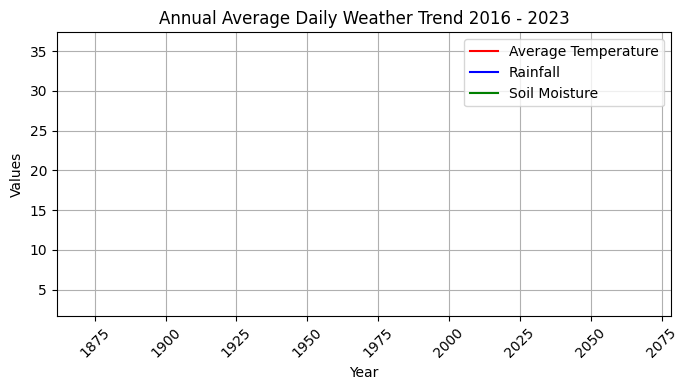

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Resample to annual frequency and calculate mean
annual_stats = weather_auckland.resample('Y').mean()

# Plotting
plt.figure(figsize=(7, 4))

plt.plot(annual_stats.index.year, annual_stats['Tavg'], color='red', label='Average Temperature')
plt.plot(annual_stats.index.year, annual_stats['Rain(mm)'], color='blue', label='Rainfall')
plt.plot(annual_stats.index.year, annual_stats['SoilMoist(%)'], color='green', label='Soil Moisture')


plt.title('Annual Average Daily Weather Trend 2016 - 2023')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

                 WDir(Deg)  WSpd(m/s)  GustDir(Deg)  GustSpd(m/s)  \
WDir(Deg)         1.000000  -0.107571      0.501690      0.025982   
WSpd(m/s)        -0.107571   1.000000     -0.021222      0.542625   
GustDir(Deg)      0.501690  -0.021222      1.000000      0.100038   
GustSpd(m/s)      0.025982   0.542625      0.100038      1.000000   
WindRun(Km)      -0.134161   0.529534     -0.074316      0.534983   
Rain(mm)         -0.181145   0.146581     -0.112325      0.170349   
Tdry(c)          -0.121917   0.163545     -0.160878      0.059499   
Twet(c)          -0.131265   0.075136     -0.173540      0.009513   
RH(%)            -0.011322  -0.309656     -0.020520     -0.177102   
Tmax(c)          -0.071851  -0.038905     -0.173496     -0.117823   
Tmin(c)          -0.141557   0.257155     -0.141057      0.129386   
Tgmin(C)         -0.132017   0.269474     -0.090867      0.155594   
ET10©            -0.094714   0.088114     -0.138802     -0.012456   
ET20©            -0.087500   0.064

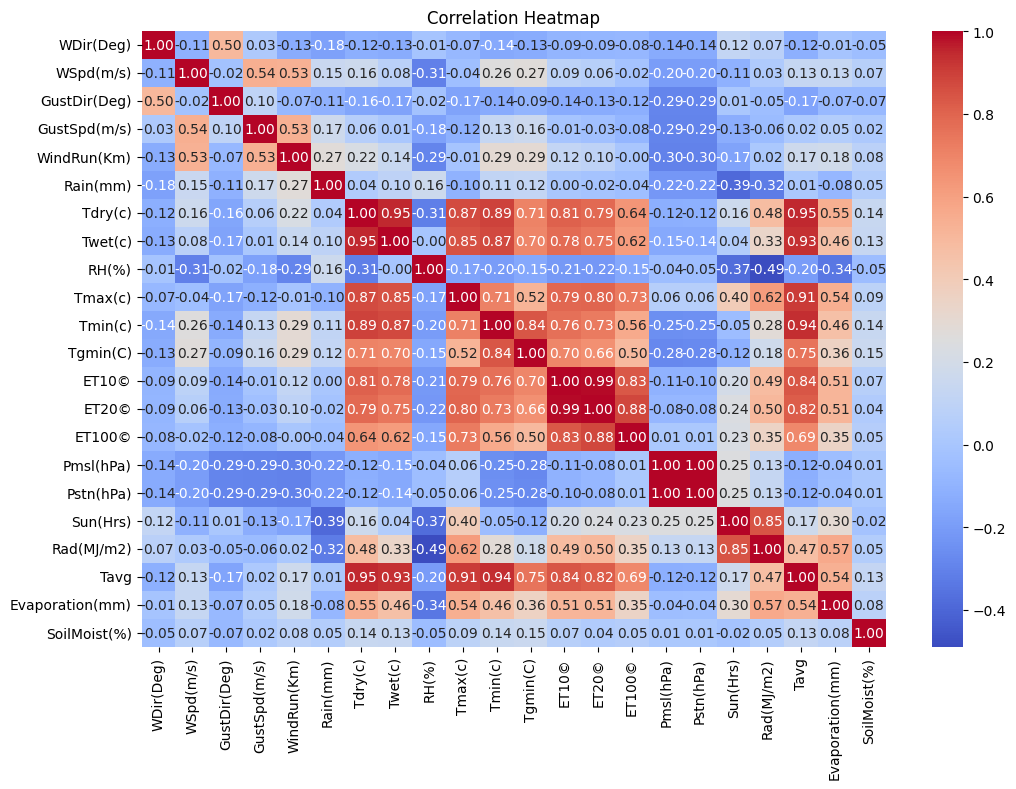

In [ ]:
import seaborn as sns
# Convert non-numeric values to NaN
weather_auckland = weather_auckland.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
correlation_matrix = weather_auckland.corr()
print(correlation_matrix)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

How Rainfall Associates with Soil Moisture:
- Rainfall and soil moisture have a moderate negative correlation of -0.30.
- This negative correlation suggests that periods of higher rainfall lead to increased moisture loss from the soil, whether through runoff or evapotranspiration, thereby reducing soil moisture levels.

How Temperature Associates with Rainfall:
- Temperature (both average and maximum) does not show a significant correlation with rainfall.
-  The correlation coefficients for temperature and rainfall (Tavg and Rain) are relatively low (0.12 and 0.14 respectively), indicating that there isn't a strong direct relationship between temperature and rainfall in the dataset.

How Temperature Associates with Soil Moisture:
- Maximum Temperature and Soil Moisture have a weak negative correlation of -0.22.
-  These weak negative correlations suggest that higher temperatures might lead to increased evaporation rates, reducing soil moisture content over time.

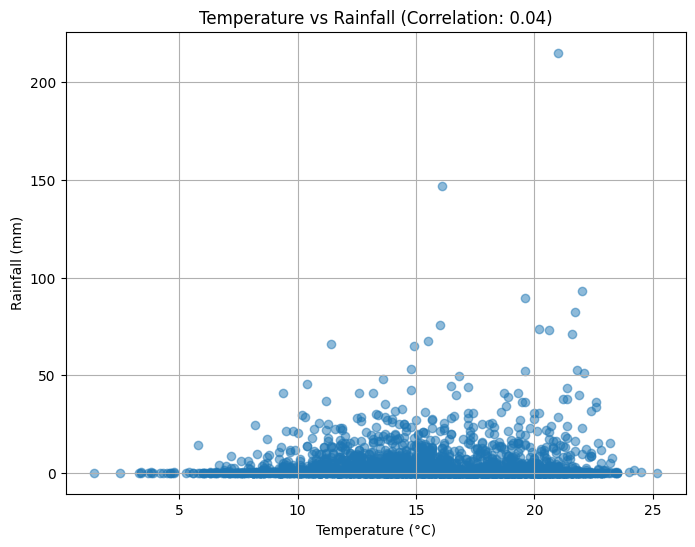

In [ ]:
correlation_temp_rain = weather_auckland['Tdry(c)'].corr(weather_auckland['Rain(mm)'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weather_auckland['Tdry(c)'], weather_auckland['Rain(mm)'], alpha=0.5)
plt.title(f'Temperature vs Rainfall (Correlation: {correlation_temp_rain:.2f})')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)

print(f"Pearson correlation coefficient: {correlation_temp_rain:.2f}")
plt.show()

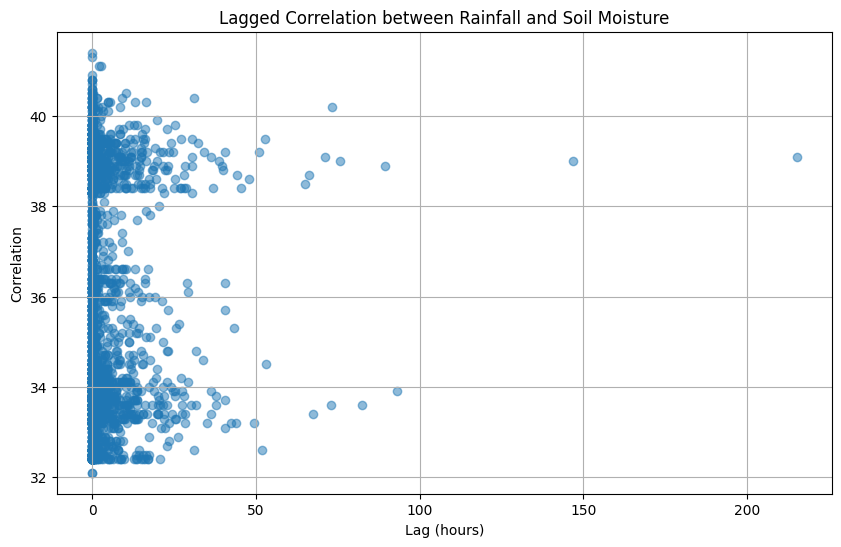

TypeError: unsupported format string passed to list.__format__

In [ ]:
lags = range(1, 25)  # Lags from 1 to 24 hours
correlations = [weather_auckland['Rain(mm)'].shift(lag).corr(weather_auckland['SoilMoist(%)']) for lag in lags]

plt.figure(figsize=(10, 6))
plt.scatter(weather_auckland['Rain(mm)'], weather_auckland['SoilMoist(%)'], alpha=0.5)
plt.title('Lagged Correlation between Rainfall and Soil Moisture')
plt.xlabel('Lag (hours)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

print(f"Pearson correlation coefficient: {correlations:.2f}")

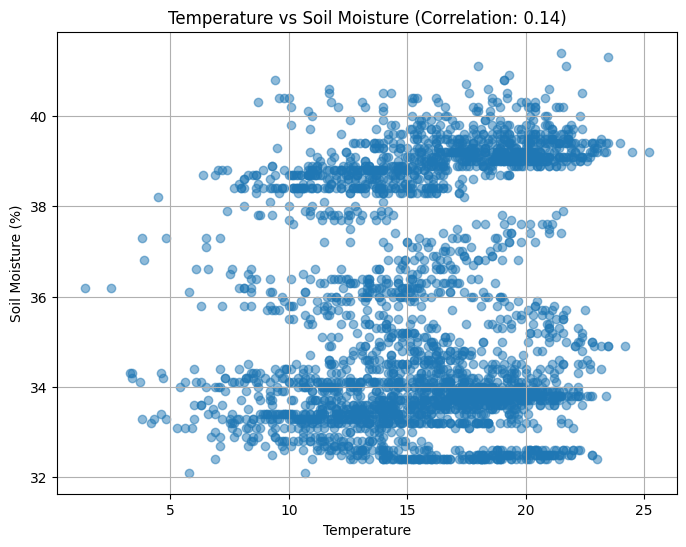

Pearson correlation coefficient: 0.14


In [ ]:
# Calculate correlation coefficient
correlation_temp_soil = weather_auckland['Tdry(c)'].corr(weather_auckland['SoilMoist(%)'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weather_auckland['Tdry(c)'], weather_auckland['SoilMoist(%)'], alpha=0.5)
plt.title(f'Temperature vs Soil Moisture (Correlation: {correlation_temp_soil:.2f})')
plt.xlabel('Temperature')
plt.ylabel('Soil Moisture (%)')
plt.grid(True)
plt.show()

print(f"Pearson correlation coefficient: {correlation_temp_soil:.2f}")

In [ ]:
weather_auckland['Date'] = pd.to_datetime(weather_auckland['Date'], format='%Y%m%d')
weather_auckland.set_index('Date', inplace=True)

# Define the start and end date for the analysis period
start_date = weather_auckland.index.min()
end_date = weather_auckland.index.max()

# Slice the data based on the date range
drought_impact = weather_auckland.loc[start_date:end_date]
cyclone_impact = weather_auckland.loc[start_date:end_date]
storm_impact = weather_auckland.loc[start_date:end_date]

plt.figure(figsize=(14, 10))

# Temperature
plt.subplot(4, 1, 1)
plt.plot(drought_impact.index, drought_impact['Tdry(c)'], label='Temperature (C)', color='tab:blue')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.legend()
plt.title('Temperature')

# Rainfall
plt.subplot(4, 1, 2)
plt.bar(drought_impact.index, drought_impact['Rain(mm)'], label='Rainfall (mm)', color='tab:green')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.legend()
plt.title('Rainfall')

# Soil Moisture
plt.subplot(4, 1, 3)
plt.plot(drought_impact.index, drought_impact['SoilMoist(%)'], label='Soil Moisture (%)', color='tab:orange')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.legend()
plt.title('Soil Moisture')

plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

In [ ]:
# Calculate average values for each variable before and after events
def calculate_average_impact(data, event_date, variable):
    before_event = data[data.index < event_date][variable]
    after_event = data[data.index >= event_date][variable]
    avg_before = np.mean(before_event)
    avg_after = np.mean(after_event)
    return avg_before, avg_after

In [ ]:
motat_data = weather_auckland.loc[start_date:end_date]

events = {
    'February 13, 2020': pd.Timestamp('2020-02-13'),
    'February 14, 2023': pd.Timestamp('2023-02-14'),
    'May 9, 2023': pd.Timestamp('2023-05-09')
}

# Calculate average values for each event
for event, date in events.items():
    print(f"Event: {event}")
    avg_temp_before, avg_temp_after = calculate_average_impact(weather_auckland, date, 'Tdry(c)')
    avg_rain_before, avg_rain_after = calculate_average_impact(weather_auckland, date, 'Rain(mm)')
    avg_soilmoist_before, avg_soilmoist_after = calculate_average_impact(weather_auckland, date, 'SoilMoist(%)')
    
    print(f"Temperature change (C): {avg_temp_after - avg_temp_before:.2f}")
    print(f"Rainfall change (mm): {avg_rain_after - avg_rain_before:.2f}")
    print(f"Soil Moisture change (%): {avg_soilmoist_after - avg_soilmoist_before:.2f}")
    print()

Event: February 13, 2020
Temperature change (C): 0.73
Rainfall change (mm): 0.38
Soil Moisture change (%): 3.00

Event: February 14, 2023
Temperature change (C): 0.66
Rainfall change (mm): 0.14
Soil Moisture change (%): 4.17

Event: May 9, 2023
Temperature change (C): 0.11
Rainfall change (mm): 0.17
Soil Moisture change (%): 4.14

